In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

data = pd.read_csv('./src/USA_cars_datasets.csv')

Построим модель линейной регрессии как зависимость года производства автомобиля и его пробега.

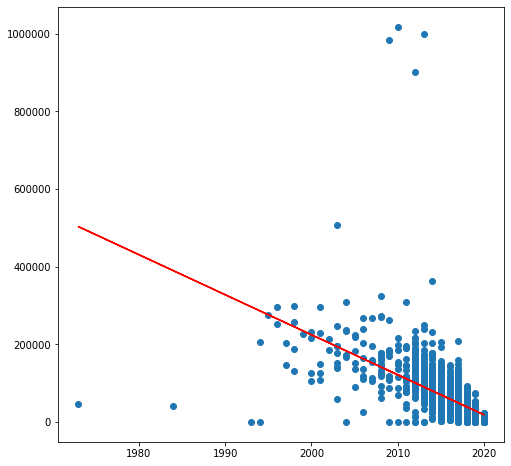

In [8]:
x = data.year.values.reshape(-1, 1)
y = data.mileage.values

model = LinearRegression().fit(x,y)

y_pred = model.predict(x.reshape(-1, 1))
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

Построим график ошибок

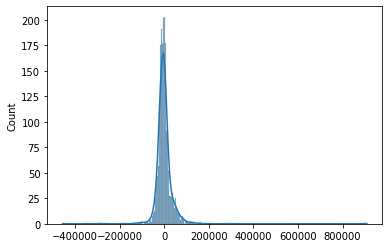

In [12]:
errors = y - y_pred

sns.histplot(data=errors, kde=True)

Построим аналогичную модель, но теперь для самых популярных марок авто

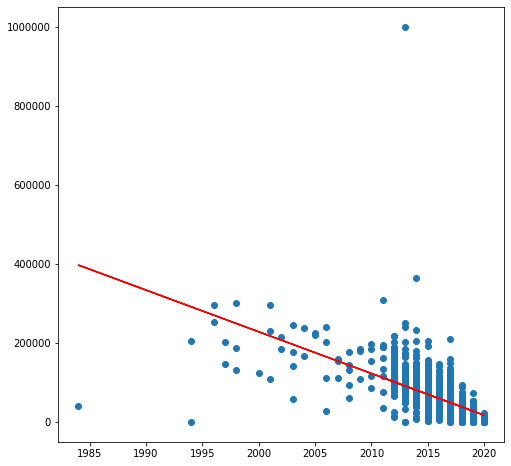

In [9]:
new_data = data[(data.brand == 'ford') | (data.brand == 'dodge')]
x2 = new_data.year.values.reshape(-1, 1)
y2 = new_data.mileage.values
model2 = LinearRegression().fit(x2,y2)

y2_pred = model2.predict(x2.reshape(-1, 1))
plt.figure(figsize=(8, 8))
plt.scatter(x2, y2)
plt.plot(x2, y2_pred, color='r')

Построим график ошибки

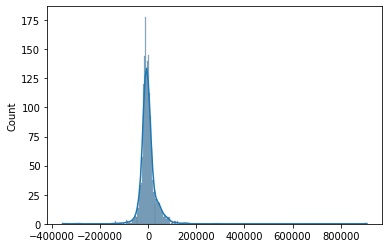

In [11]:
errors2 = y2 - y2_pred

sns.histplot(data=errors2, kde=True)

Большинство результатов были предсказанны верно. Остальные были ошибочными примерно одинаково и в избыток и в недостаток. 